In [5]:
'''
This script implements the SUTRA model for India.
It outputs the regression outcomes, and plots the ``detected trajectory'' for India using these parameters.
'''

import pandas as pd
import numpy as np
from datetime import datetime, date
import datetime
import sklearn
from matplotlib import pyplot as plt 
from sutra import create_detected_trajectory, create_beta_rho_smooth, regress, create_plots

p0 = p0 = 1350000000
cir = 1/33
gamma = 0.1

In [6]:
# wave 1 regression
wave1_phase_starts = [date(2020,3,2), date(2020,3,20), date(2020,4,24), date(2020,6,21),date(2020,8,22),  date(2020,11,2), date(2021,1,1), date(2021,2,10)]
wave1_drift_periods = np.array([5, 0, 5, 30, 10,10,10, 40])
wave1_phase_lengths = [(wave1_phase_starts[i+1] - wave1_phase_starts[i]).days for i in range(0, len(wave1_phase_starts)-1)]

df = regress(gamma,p0,cir,wave1_phase_starts, (np.ones(2))*40, np.zeros(2))
num_phases = 7
betatilde_t, rhotilde_t = create_beta_rho_smooth(df['betatilde'].values[0:num_phases], df['rhotilde (%)'].values[0:num_phases]/100, wave1_phase_starts[0:num_phases], wave1_drift_periods[0:num_phases], wave1_phase_lengths[0:num_phases])
print('Regression outcome for phase 1:')
display(df)

T0 = 40
RT0 = 0
wave1_NT, wave1_T, wave1_RT = create_detected_trajectory(betatilde_t, rhotilde_t, T0, RT0, p0, gamma)

# wave 2 regression
wave2_phase_starts = [date(2021,2,10), date(2021,3,29), date(2021,5,25), date(2021,6,18), date(2021,8,23), date(2021,11,20) ]
wave2_drift_periods = np.array([40, 26,3,42,2,5 ])
wave2_phase_lengths = [(wave2_phase_starts[i+1] - wave2_phase_starts[i]).days for i in range(0, len(wave2_phase_starts)-1)]

df = regress(gamma,p0,cir,wave2_phase_starts, (np.ones(2))*1000, (np.ones(2))*100000)#wave1_T, (np.ones(2))*1000000)
print('Regression outcome for phase 2:')
display(df)

num_phases = 5
betatilde_t, rhotilde_t = create_beta_rho_smooth(df['betatilde'].values[0:num_phases], df['rhotilde (%)'].values[0:num_phases]/100, wave2_phase_starts[0:num_phases], wave2_drift_periods[0:num_phases], wave2_phase_lengths[0:num_phases])

T0 = 20000
RT0 = 100000
wave2_NT, wave2_T, wave2_RT = create_detected_trajectory(betatilde_t, rhotilde_t, T0, RT0, p0, gamma)

# wave 3 regression
wave3_phase_starts = [date(2021,11,20), date(2022,2,1), date(2022,2,15)]
wave3_drift_periods = np.array([5, 5, 5])
wave3_phase_lengths = [(wave3_phase_starts[i+1] - wave3_phase_starts[i]).days for i in range(0, len(wave3_phase_starts)-1)]

df = regress(gamma,p0,cir,wave3_phase_starts, (np.ones(2))*500, np.ones(2)*p0*2/100)
print('Regression outcome for phase 3:')
display(df)

num_phases = 2
betatilde_t, rhotilde_t = create_beta_rho_smooth(df['betatilde'].values[0:num_phases], df['rhotilde (%)'].values[0:num_phases]/100, wave3_phase_starts[0:num_phases], wave3_drift_periods[0:num_phases], wave3_phase_lengths[0:num_phases])

T0 = 500
RT0 = p0*2/100
wave3_NT, wave3_T, wave3_RT = create_detected_trajectory(betatilde_t, rhotilde_t, T0, RT0, p0, gamma)

Regression outcome for phase 1:


,Phase Start,betatilde,rhotilde (%),beta (approx),rho (approx),r2
0,2020-03-02,0.342305,1002.919061,0.353002,33096.329027,0.967399
1,2020-03-20,0.175216,0.009719,0.180692,0.320735,0.993064
2,2020-04-24,0.136451,0.515196,0.140715,17.001475,0.993256
3,2020-06-21,0.175368,0.690006,0.180848,22.770194,0.996665
4,2020-08-22,0.150526,1.396886,0.155230,46.097234,0.969224
5,2020-11-02,0.286451,0.989742,0.295403,32.661498,0.989580
6,2021-01-01,1.860049,0.828975,1.918176,27.356184,0.999937


Regression outcome for phase 2:


,Phase Start,betatilde,rhotilde (%),beta (approx),rho (approx),r2
0,2021-02-10,0.199314,0.550785,0.205542,18.175921,0.984876
1,2021-03-29,0.210726,1.940970,0.217312,64.052026,0.998479
2,2021-05-25,0.355366,1.688252,0.366471,55.712315,0.999959
3,2021-06-18,2.105312,1.422512,2.171103,46.942886,0.997254
4,2021-08-23,1.039779,1.974313,1.072272,65.152319,0.999874


Regression outcome for phase 3:


,Phase Start,betatilde,rhotilde (%),beta (approx),rho (approx),r2
0,2021-11-20,1.137620,2.680475,1.173171,88.455686,0.999847
1,2022-02-01,2.088469,2.706242,2.153733,89.305982,0.999999


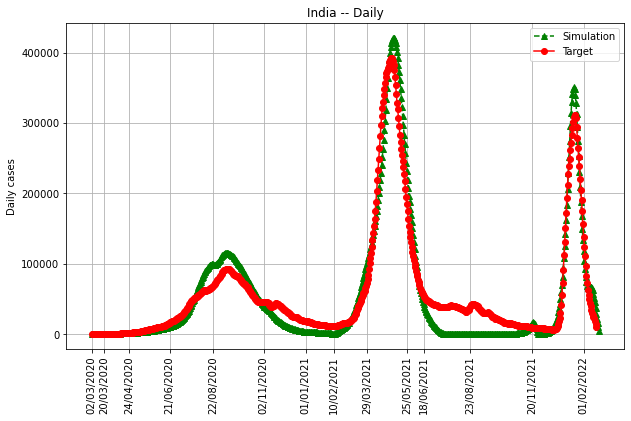

In [3]:
# plot the detected trajectory
output = np.concatenate((wave1_NT, wave2_NT, wave3_NT))
phases = wave1_phase_starts[:-1] + wave2_phase_starts[:-1] + wave3_phase_starts

create_plots(phases[:-1], date(2020,3,2), output, 720)